# Feature Selection
The three main pillars of Feature Selection are:
 
 - Filter Methods: ranking features, where the highest ranked features are kept based on some ranking factor (like chi2) and applied to your target variable
 
 - Wrapper Methods: wrapper Methods work by using the predictor performance as the objective function and using search algorithms to find a subset that maximizes performance (e.g. RFE)
 
 - Embedded Methods: before splitting any data, embedded methods use variable selection as part of the training process (decision trees, including ensembles of decision trees like random forest).

Read more on these here, in this paper http://romisatriawahono.net/lecture/rm/survey/machine%20learning/Chandrashekar%20-%20Feature%20Selection%20Methods%20-%202014.pdf.

We can summarize feature selection as follows

**Feature Selection**: Select a subset of input features from the dataset.
 - **Unsupervised**: Do not use the target variable (e.g. remove redundant variables).
     - Correlation
 - **Supervised**: Use the target variable (e.g. remove irrelevant variables).
     - **Wrapper**: Search for well-performing subsets of features.
         - RFE
     - **Filter**: Select subsets of features based on their relationship with the target.
         - Statistical Methods
         - Feature Importance Methods
     - **Intrinsic**: Algorithms that perform automatic feature selection during training.
         - Decision Trees, ensambles of decision trees (random forests)
Alternatively to feature selection:

**Dimensionality Reduction**: Project input data into a lower-dimensional feature space.


It is important to remove features that are not relevant for the classification problem. **Redundant features** are those that are correlated with other features and not relevant in the sense that they do not improve the discriminatory ability of a set of features.


In [3]:
# LIBRARIES

import numpy as np
import pandas as pd

from sklearn.feature_selection import mutual_info_classif

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [5]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Categorical to numeric conversion

The Class attribute is categorical. In order to compute the correlation between this attribute and the others (the features) we can apply a conversion (coding):
 - **one hot encoding**: not ordinal, i.e. we don't impose an order of the classes, which influences the correlation/distance measures but increases the number of columns in the dataset.
 - **label encoding**: ordinal, we impose an order but we don't add any column to the dataframe.

In [9]:
## Numeric label
df_numeric = df.copy()
df_numeric['Class'] = pd.factorize(df_numeric['Class'])[0]
df_numeric.groupby('Class').mean()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Class,,,,,,,,,,,,,,,,
0,39881.299951,727.672440,251.291957,201.909653,1.245182,0.584781,40269.567341,224.948441,0.771674,0.990351,0.944508,0.896841,0.006334,0.002541,0.805149,0.998383
1,69804.133132,1046.105764,370.044279,240.309352,1.544395,0.754665,71025.729198,297.311018,0.749273,0.982804,0.800200,0.805001,0.005357,0.001394,0.649144,0.995739
2,173485.059387,1585.619079,593.152075,374.352547,1.585550,0.770518,175813.116858,468.941426,0.776559,0.986902,0.864421,0.792622,0.003442,0.000844,0.629195,0.991841
3,75538.211043,1057.634282,409.499538,236.370616,1.733663,0.814804,76688.503067,309.535280,0.758953,0.985021,0.845934,0.756703,0.005459,0.001107,0.573022,0.990584
4,53648.508817,919.859676,372.570290,184.170663,2.026119,0.867443,54440.091805,260.730715,0.706393,0.985480,0.794420,0.700880,0.007007,0.001048,0.491791,0.991926
5,44729.128604,796.418737,299.380258,190.800250,1.570083,0.767277,45273.099772,238.335316,0.749445,0.987971,0.884652,0.797345,0.006720,0.001683,0.636358,0.995385
6,32118.710942,665.209536,246.557279,165.657143,1.490471,0.736632,32498.435138,201.683813,0.752953,0.988226,0.908114,0.819110,0.007755,0.002161,0.671636,0.996914


In [18]:
## One hot
y = pd.get_dummies(df.Class, prefix='Class')
df_onehot = pd.concat([df[df.columns[:-1]], y], axis=1)
df_onehot

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,0,0,0,0,0,1,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,...,0.003564,0.909851,0.998430,0,0,0,0,0,1,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,0,0,0,0,0,1,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,0,0,0,0,0,1,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.003665,0.941900,0.999166,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,...,0.001749,0.642988,0.998385,0,0,0,1,0,0,0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,...,0.001886,0.676099,0.998219,0,0,0,1,0,0,0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,...,0.001888,0.676884,0.996767,0,0,0,1,0,0,0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,...,0.001852,0.668237,0.995222,0,0,0,1,0,0,0


## Correlation

Drop the really higly correlated features!


### Pearson (linear correlation)

The Pearson product-moment correlation is one of the most commonly used correlations in statistics. It’s a measure of the strength and the direction of a linear relationship between two variables. It relies on four key assumptions:

 - Data needs to be interval or ratio. These types of continous data are important for how the correlation assumes values in variables will be related, and thus ordinal or categorical variable coding won’t work.

 - Pearson only works with linear data. That means that your two correlated factors have to approximate a line, and not a curved or parabolic shape. It’s not that you can’t use pearson to see if there is a linear relationship in data, it’s just that there are other tests suited to analyzing those different data structures.

 - Outliers in your data can really throw off a Pearson correlation.

 - Data you are analyzing needs to be normally distributed. This can be done in a couple of ways (Skewness, Kurtosis) but it can also be done in a quick and dirty manner through 
 histograms.

---

Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here.

We need to set an absolute value, say 0.5, as the threshold for selecting the variables. If we find that the predictor variables are correlated, we can drop the variable with a lower correlation coefficient value than the target variable. We can also compute multiple correlation coefficients to check whether more than two variables correlate. This phenomenon is known as multicollinearity.

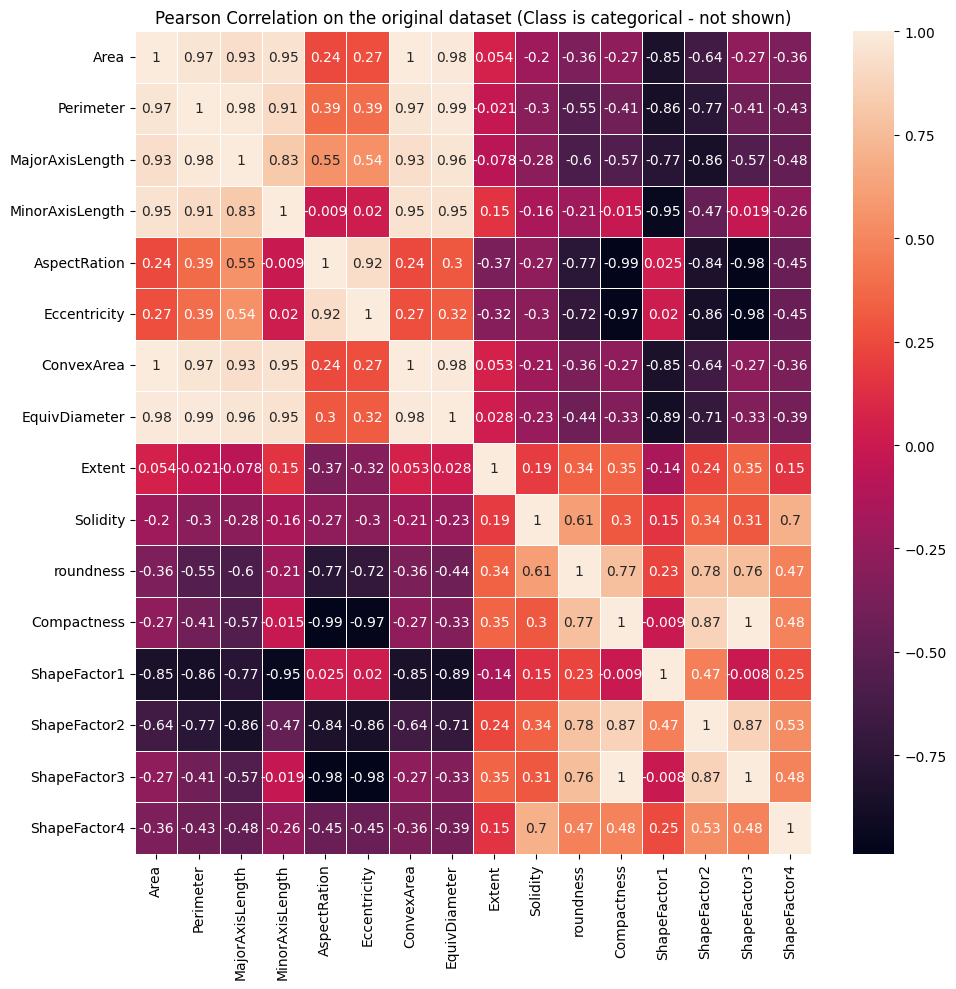

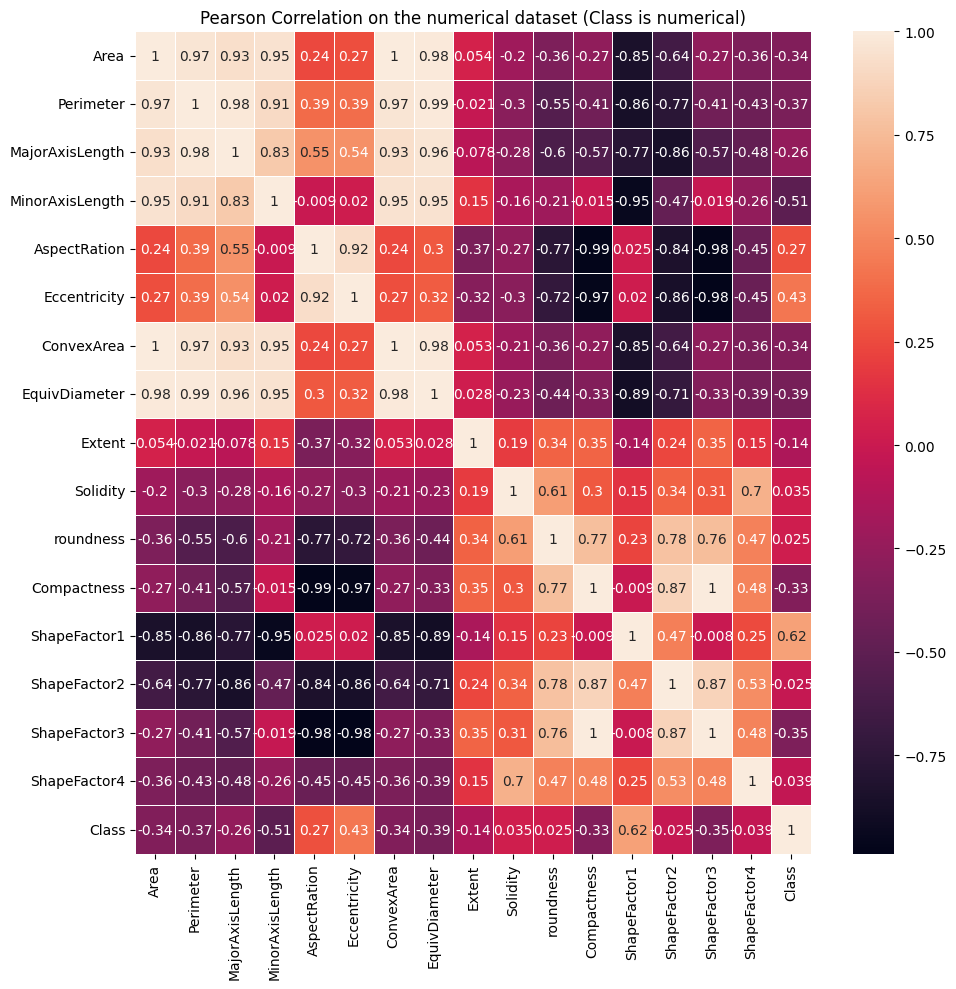

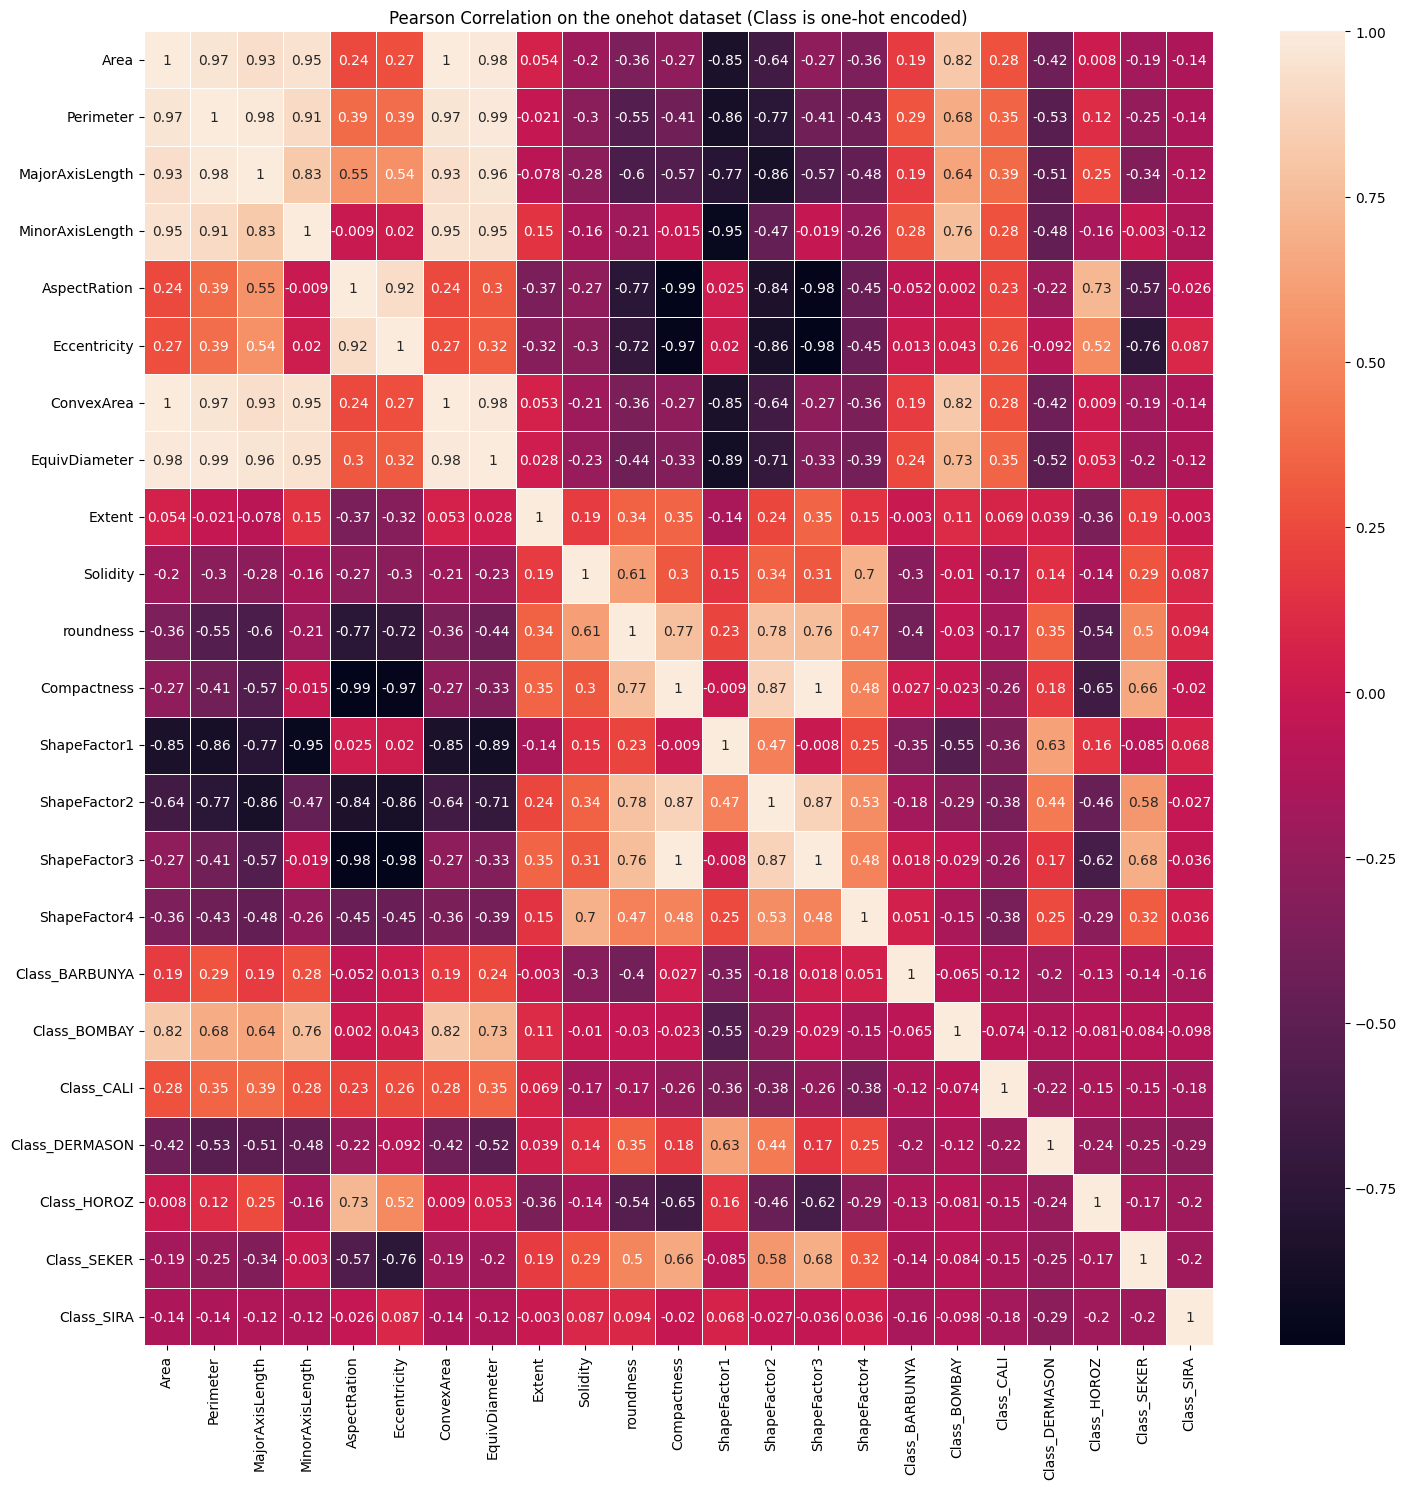

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df.corr(numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
ax.set_title("Pearson Correlation on the original dataset (Class is categorical - not shown)");
fig.tight_layout()

fig, ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_numeric.corr(numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
ax.set_title("Pearson Correlation on the numerical dataset (Class is numerical)");
fig.tight_layout()

fig, ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_onehot.corr(numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
ax.set_title("Pearson Correlation on the onehot dataset (Class is one-hot encoded)");
fig.tight_layout()


### Spearman (rank/ordinal correlation)

The nice thing about the Spearman correlation is that relies on nearly all the same assumptions as the pearson correlation, but it doesn’t rely on normality, and your data can be ordinal as well. Thus, it’s a non-parametric test. More on the spearman correlation here, http://www.statstutor.ac.uk/resources/uploaded/spearmans.pdf, and on parametric vs. non-parametric here, http://www.oxfordmathcenter.com/drupal7/node/246.

**Pearson and Spearman are nearly equivalent in the way they correlate normally distributed data**


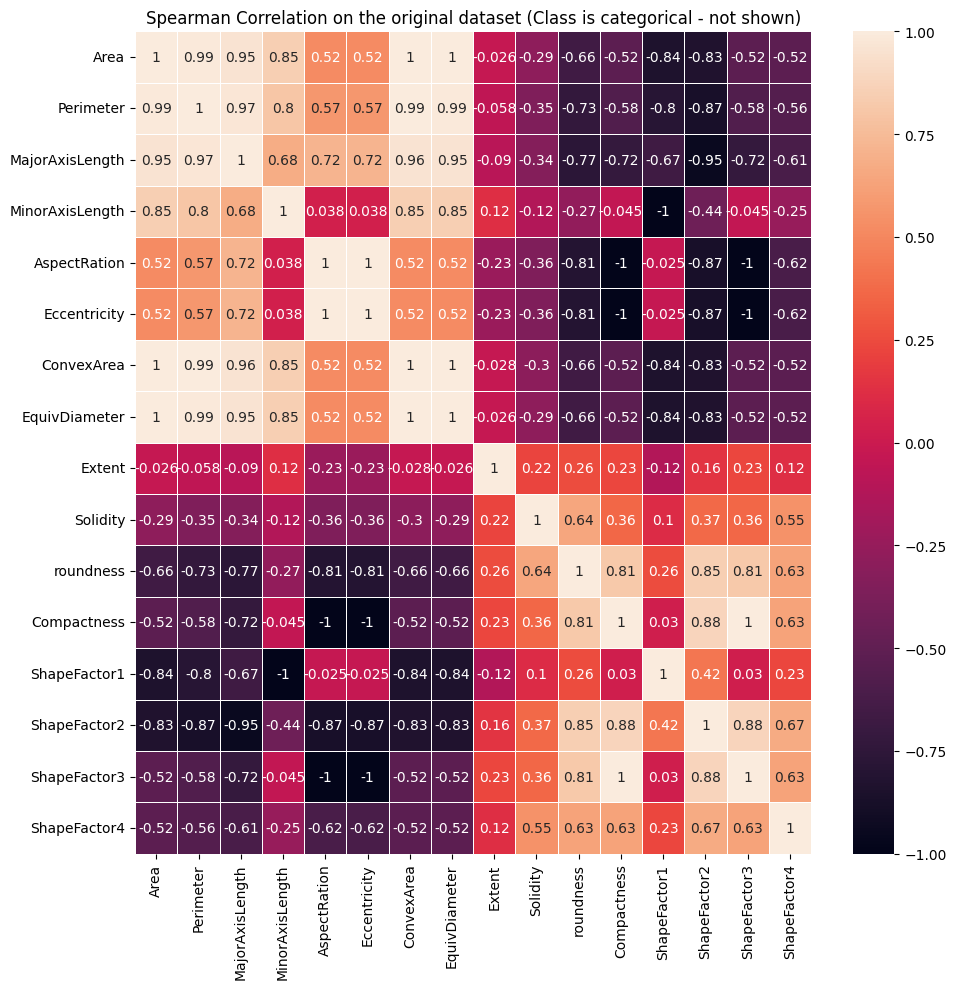

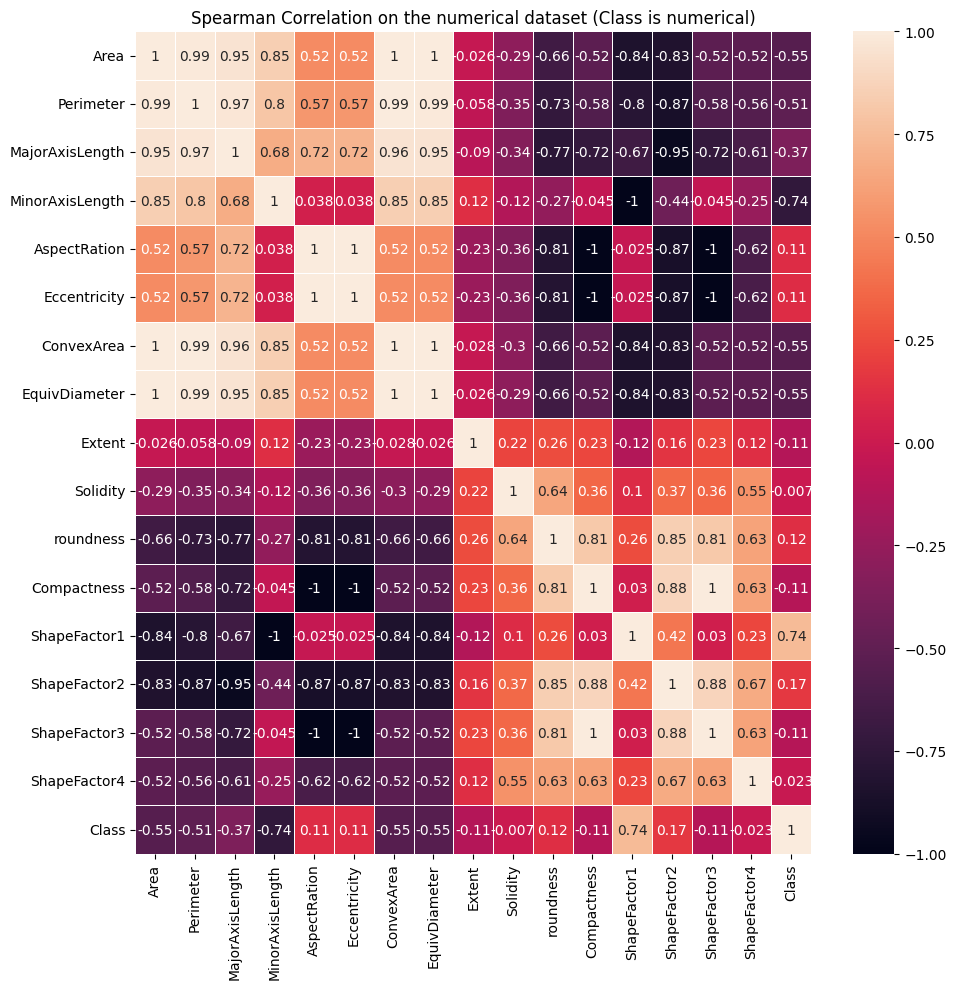

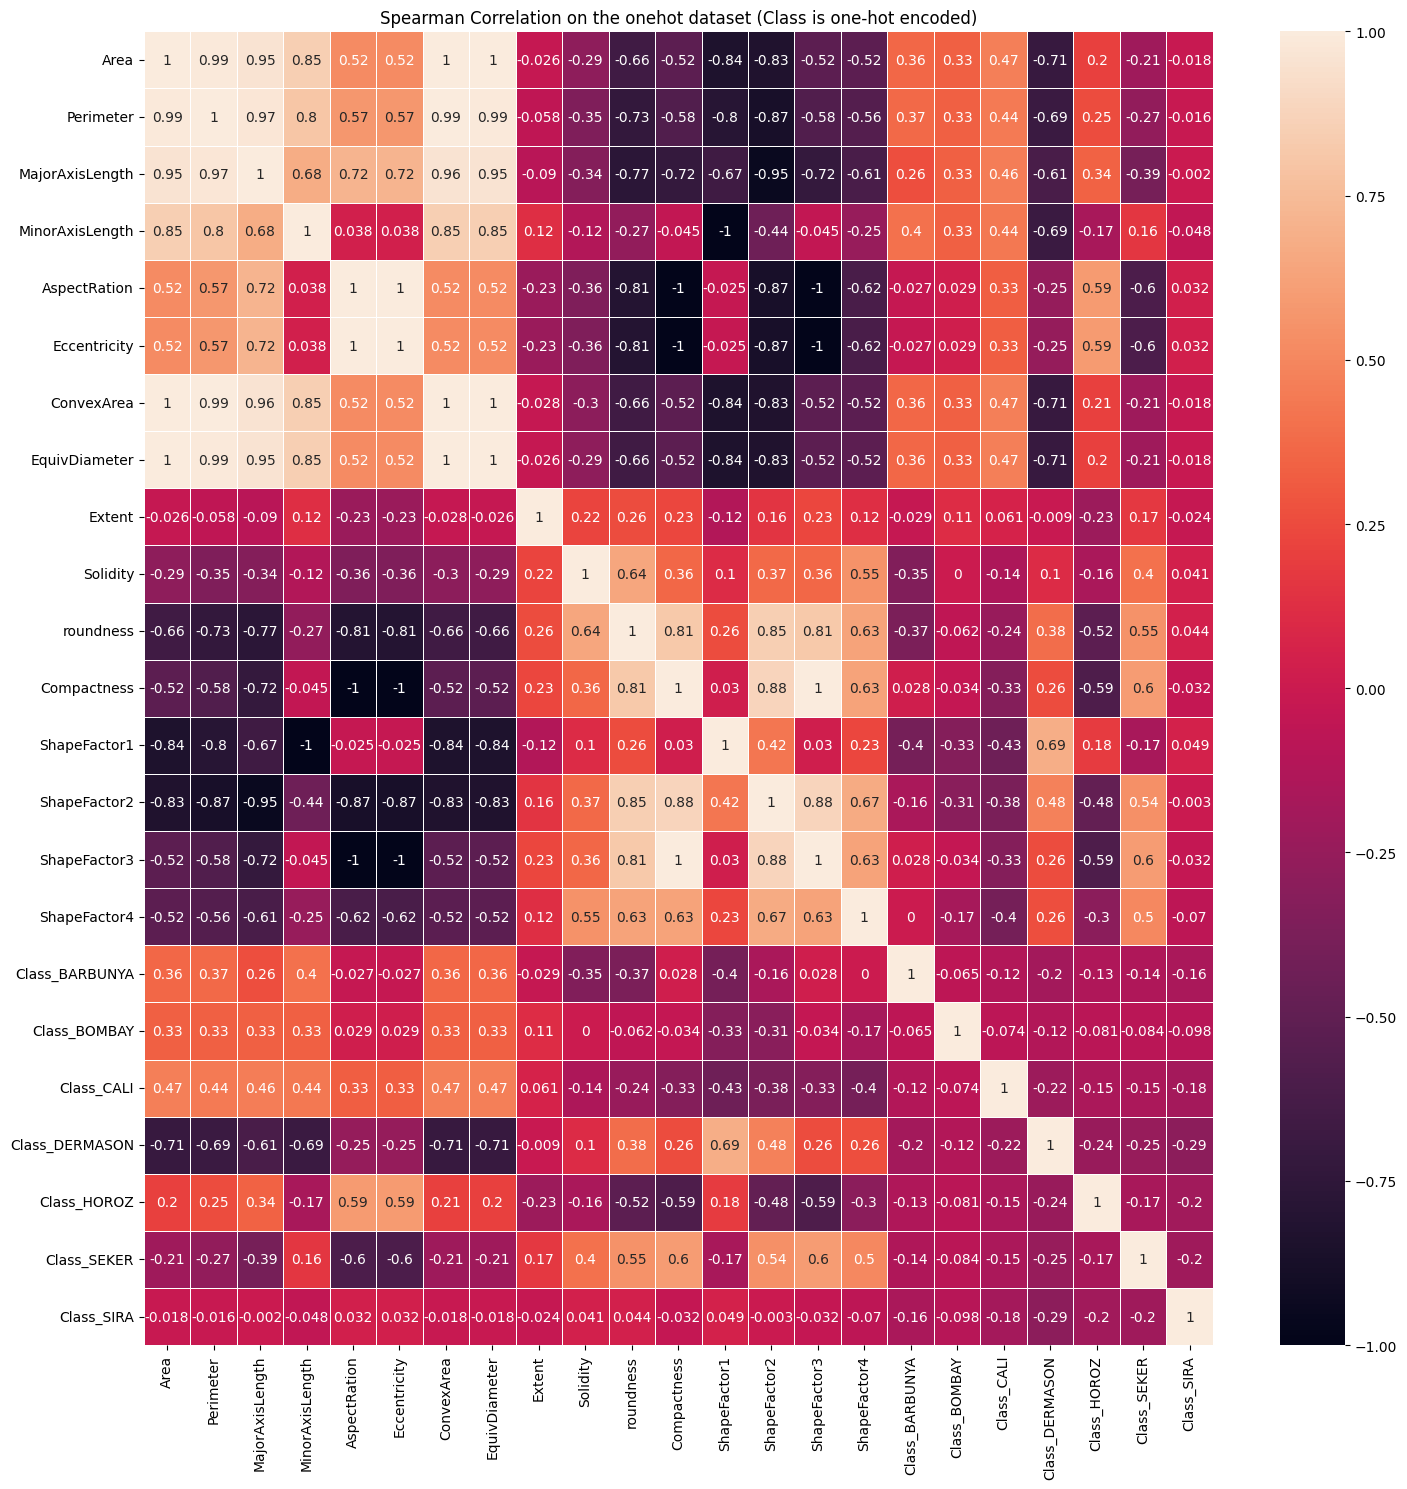

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df.corr(method="spearman" ,numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
ax.set_title("Spearman Correlation on the original dataset (Class is categorical - not shown)");
fig.tight_layout()

fig, ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_numeric.corr(method="spearman", numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
ax.set_title("Spearman Correlation on the numerical dataset (Class is numerical)");
fig.tight_layout()

fig, ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(df_onehot.corr(method="spearman", numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
ax.set_title("Spearman Correlation on the onehot dataset (Class is one-hot encoded)");
fig.tight_layout()

### Pearson vs Spareman

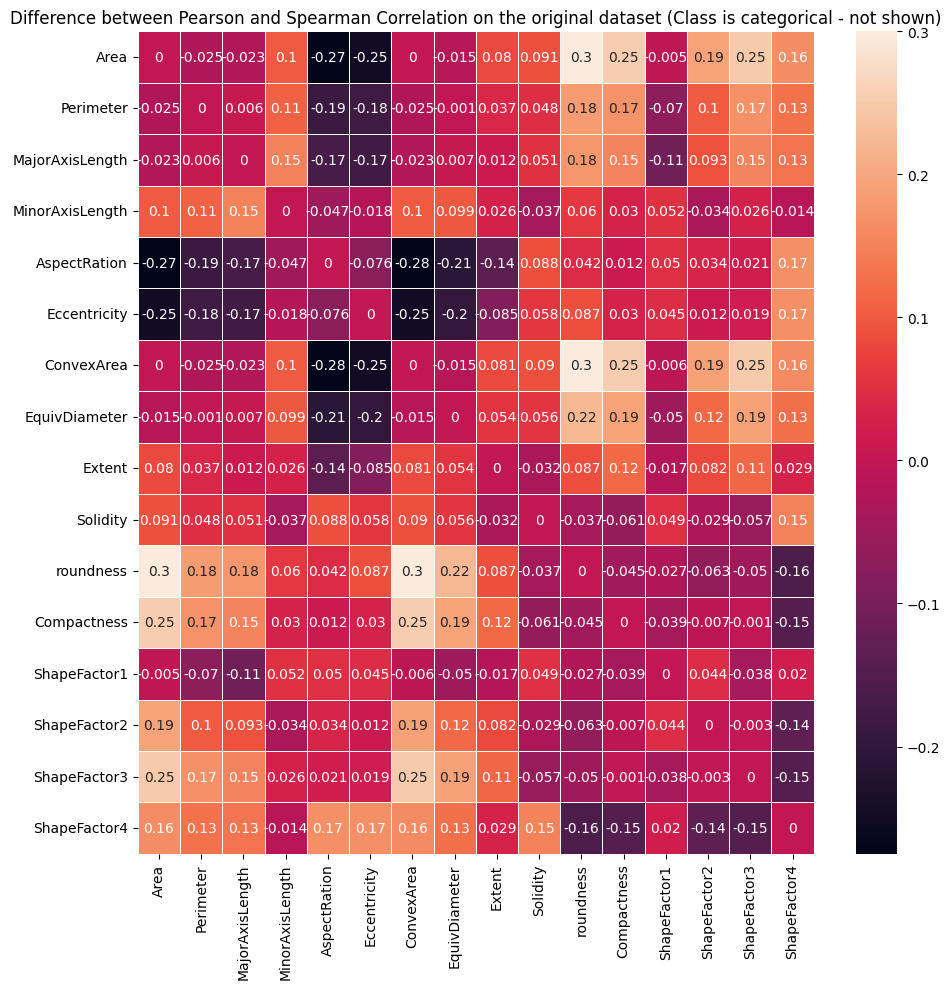

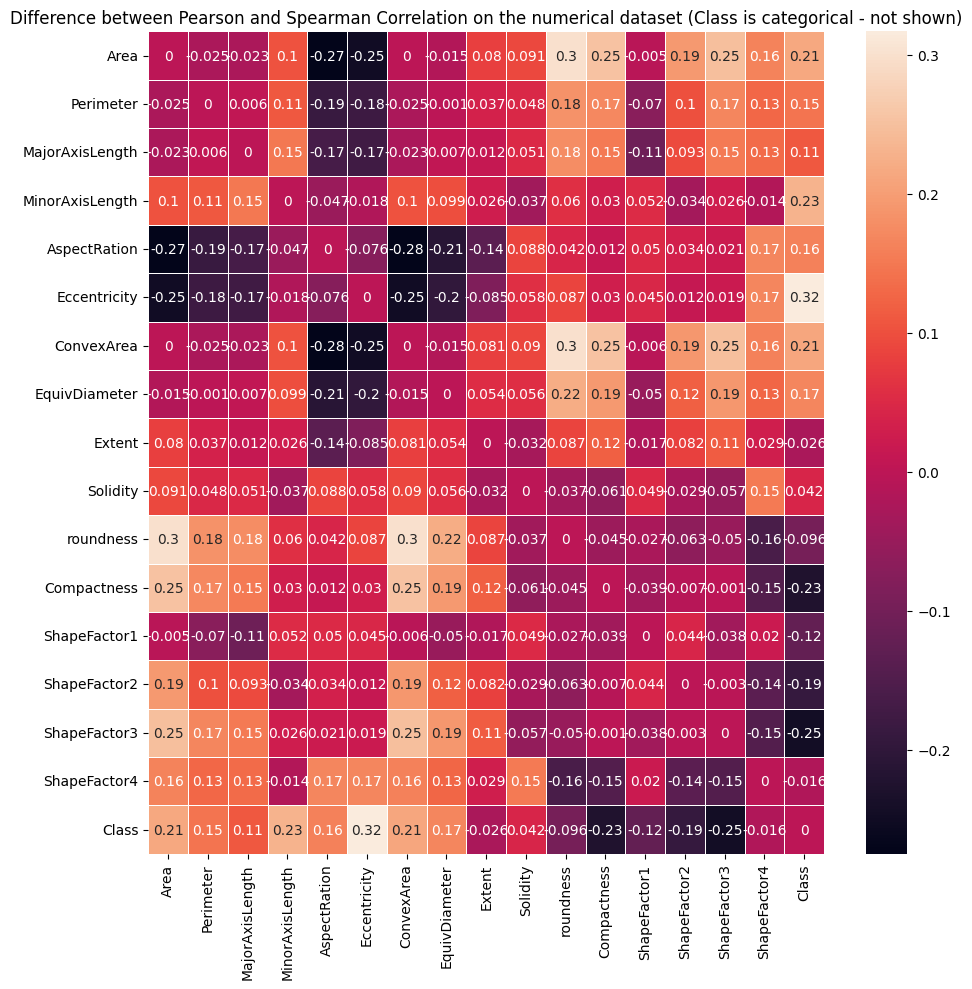

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df.corr(method="pearson" ,numeric_only=True).round(3) - df.corr(method="spearman" ,numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
ax.set_title("Difference between Pearson and Spearman Correlation on the original dataset (Class is categorical - not shown)");
fig.tight_layout()

fig, ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_numeric.corr(method="pearson" ,numeric_only=True).round(3) - df_numeric.corr(method="spearman" ,numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
ax.set_title("Difference between Pearson and Spearman Correlation on the numerical dataset (Class is categorical - not shown)");
fig.tight_layout()

### What type of correlation should I use?
There are a number of things to be aware of before going with the commonly used pearson correlations. Beyond the assumptions, it’s important to know if you are looking for relationship or dependence between variables. It’s also important to be aware what may happen to your correlations if you transform your data into ranked scores or how two different distributions of data from different can impact what statsitic your use. There are a number of different threads across forums discussing the differences between these statsitics (e.g. https://stats.stackexchange.com/questions/3943/kendall-tau-or-spearmans-rho) if you have more specific questions regarding how to use these statistics with your data.

It takes dilligence to use the right correlation!

## Statistics for Filter-Based Feature Selection Methods

The statistical measures used in filter-based feature selection are generally calculated one input variable at a time with the target variable. As such, they are referred to as univariate statistical measures. This may mean that any interaction between input variables is not considered in the filtering process.


<center><img src="images/feature_selection.png" width=1000 align="center"></center> 

### Numerical Input, Categorical Output

This is a classification predictive modeling problem with numerical input variables.

This might be the most common example of a classification problem,

Again, the most common techniques are correlation based, although in this case, they must take the categorical target into account.

 - **ANOVA correlation coefficient** (linear).
 - **Kendall’s rank coefficient** (nonlinear).

Kendall does assume that the categorical variable is ordinal.

### SelectKBest

Select features according to the k highest scores. It is possible to use multiple scores. In the case of classification:

 - **chi2**: This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.
Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

 - **f_classif**: Compute the ANOVA F-value for the provided sample. A one-way ANOVA is used to determine whether or not the means of three or more independent groups are equal.

 - **mutual_info_classif**: Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances as described in [2] and [3]. Both methods are based on the idea originally proposed in [4].


 The methods based on F-test estimate the degree of linear dependency between two random variables. On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation. Note that the chi2-test should only be applied to non-negative features, such as frequencies.


In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# for classification of categorical classes using numerical attributes we use f_classif (ANOVA correlation coefficient)

# this function will take in X, y variables with criteria, and return a dataframe with most important columns based on that criteria
def univariate_feature_selection(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

,Area,Perimeter,MinorAxisLength,ConvexArea,EquivDiameter
0,28395,610.291,173.888747,28715,190.141097
1,28734,638.018,182.734419,29172,191.272750
2,29380,624.110,175.931143,29690,193.410904
3,30008,645.884,182.516516,30724,195.467062
4,30140,620.134,190.279279,30417,195.896503
...,...,...,...,...,...
13606,42097,759.696,185.944705,42508,231.515799
13607,42101,757.499,190.713136,42494,231.526798
13608,42139,759.321,191.187979,42569,231.631261
13609,42147,763.779,190.275731,42667,231.653248


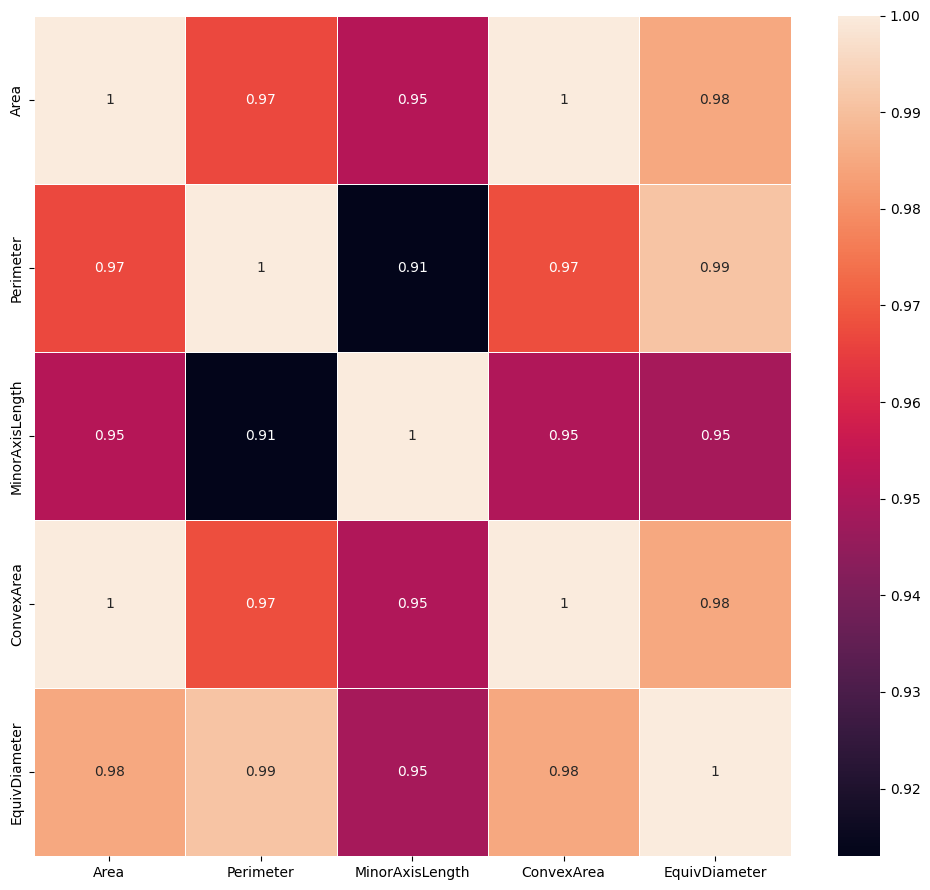

In [49]:
# Extracting data
X = df[df.columns.tolist()[:-1]]
y = df["Class"]
n_features = 5

# feature selection with f_classif
X_new = univariate_feature_selection(X, y, f_classif, k=n_features)
fig, ax = plt.subplots(figsize=(10, 9))
corr = sns.heatmap(X_new.corr(numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
fig.tight_layout()

X_new

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1